#### Answer ALL questions.

A scientist is interested in exploring the variables of this dataset and building a machine-learning
model which accurately classifies tumors as Benign or Malignant based on the tumor shape and
its geometry. You can get data and data description in the following link https://archive.
ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. Apply all classification
techniques that are known to you and suggest the best model for the classification. Write a
scientific report for that scientist after analyzing this data. Upload your report in the google
classroom on time. As a data scientist, try to find hidden information from the dataset and
mention some advice to your client if you have one.

# Scientific Report: Breast Cancer Classification Using Machine Learning

###  1. Introduction:

Breast cancer is a prevalent form of cancer, and early detection plays a crucial role in effective treatment and patient outcomes. In this study, we aim to explore a dataset containing information about tumor characteristics to build machine learning models that accurately classify tumors as Benign or Malignant based on their shape and geometry.

# 2. Dataset Description:

The dataset comprises various features describing the characteristics of breast tumors, including attributes related to tumor shape and geometry. Each instance in the dataset is labeled as either Benign or Malignant, indicating the nature of the tumor.

In [3]:
# For Warnings Ignore
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Breast Cancer Wisconsin.csv")

# Display the first few rows of the dataset
df.head().T


,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
# Display summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It looks like you're listing the column names of the dataset. Here's the full list with a brief explanation of each column:

1. **id**: Unique identifier for each entry.
2. **diagnosis**: The diagnosis of the breast tissues, where 'M' indicates malignant and 'B' indicates benign.
3. **radius_mean**: Mean of distances from center to points on the perimeter.
4. **texture_mean**: Standard deviation of gray-scale values.
5. **perimeter_mean**: Mean size of the core tumor mass.
6. **area_mean**: Mean area of the core tumor mass.
7. **smoothness_mean**: Mean of local variation in radius lengths.
8. **compactness_mean**: Mean of perimeter^2 / area - 1.0.
9. **concavity_mean**: Mean severity of concave portions of the contour.
10. **concave points_mean**: Mean number of concave portions of the contour.
11. **symmetry_mean**: Symmetry of the breast.
12. **fractal_dimension_mean**: "Coastline approximation" - 1.
13. **radius_se**: Standard error of the mean of distances from center to points on the perimeter.
14. **texture_se**: Standard error of gray-scale values.
15. **perimeter_se**: Standard error of the size of the core tumor mass.
16. **area_se**: Standard error of the area of the core tumor mass.
17. **smoothness_se**: Standard error of local variation in radius lengths.
18. **compactness_se**: Standard error of perimeter^2 / area - 1.0.
19. **concavity_se**: Standard error of severity of concave portions of the contour.
20. **concave points_se**: Standard error for the number of concave portions of the contour.
21. **symmetry_se**: Standard error for symmetry of the breast.
22. **fractal_dimension_se**: Standard error for "coastline approximation" - 1.
23. **radius_worst**: "Worst" or largest mean value of the mean of distances from center to points on the perimeter.
24. **texture_worst**: "Worst" or largest mean value of standard deviation of gray-scale values.
25. **perimeter_worst**: "Worst" or largest mean value of the size of the core tumor mass.
26. **area_worst**: "Worst" or largest mean value of the area of the core tumor mass.
27. **smoothness_worst**: "Worst" or largest mean value of local variation in radius lengths.
28. **compactness_worst**: "Worst" or largest mean value of perimeter^2 / area - 1.0.
29. **concavity_worst**: "Worst" or largest mean value of severity of concave portions of the contour.
30. **concave points_worst**: "Worst" or largest mean value for the number of concave portions of the contour.
31. **symmetry_worst**: "Worst" or largest mean value of symmetry of the breast.
32. **fractal_dimension_worst**: "Worst" or largest mean value of "coastline approximation" - 1.
33. **Unnamed: 32**: This column appears to be unnamed and might be a result of an error while loading the dataset. It may be empty or contain some unknown data.

In [6]:
# Get the shape of the DataFrame
df_shape = df.shape
print("Shape of the data:", df_shape)

Shape of the data: (569, 33)


# 3. Data Exploration and Preprocessing:

Before proceeding with model building, we conducted exploratory data analysis (EDA) to understand the distribution of features, identify any missing values, and detect outliers. Additionally, we performed preprocessing steps such as feature scaling and handling any imbalanced class distribution to ensure the robustness of our models.

In [7]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
# Distribution of target variable
print(df['diagnosis'].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64


#### Convert categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical data using LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Display the first few rows to confirm the conversion
print(df.head())


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

In [10]:
# Distribution of target variable
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [11]:
print(df['diagnosis'].unique())
# Additional context
print("diagnosis: The diagnosis of the breast tissues, where 'M' indicates malignant (1) and 'B' indicates benign (0).")

[1 0]
diagnosis: The diagnosis of the breast tissues, where 'M' indicates malignant (1) and 'B' indicates benign (0).


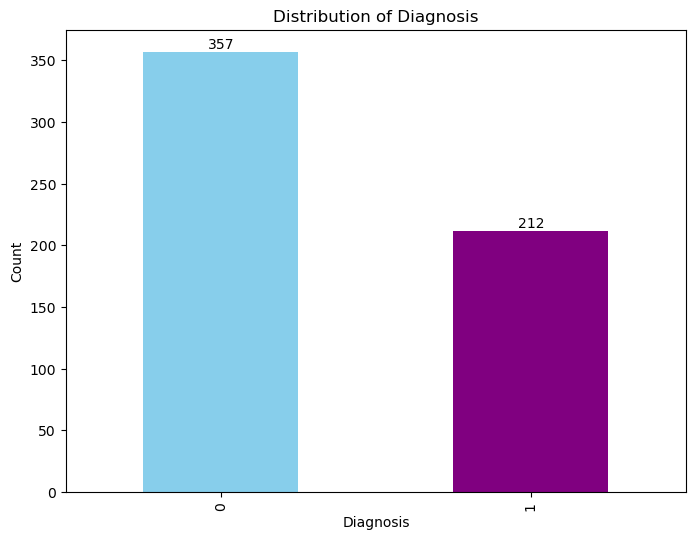

In [14]:
import matplotlib.pyplot as plt

# Plotting the histogram with sky blue and purple colors
plt.figure(figsize=(8, 6))
value_counts = df['diagnosis'].value_counts()
bars = value_counts.plot(kind='bar', color=['skyblue', 'purple'])

# Adding labels and title
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Adding count values on top of bars
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Displaying the plot
plt.show()

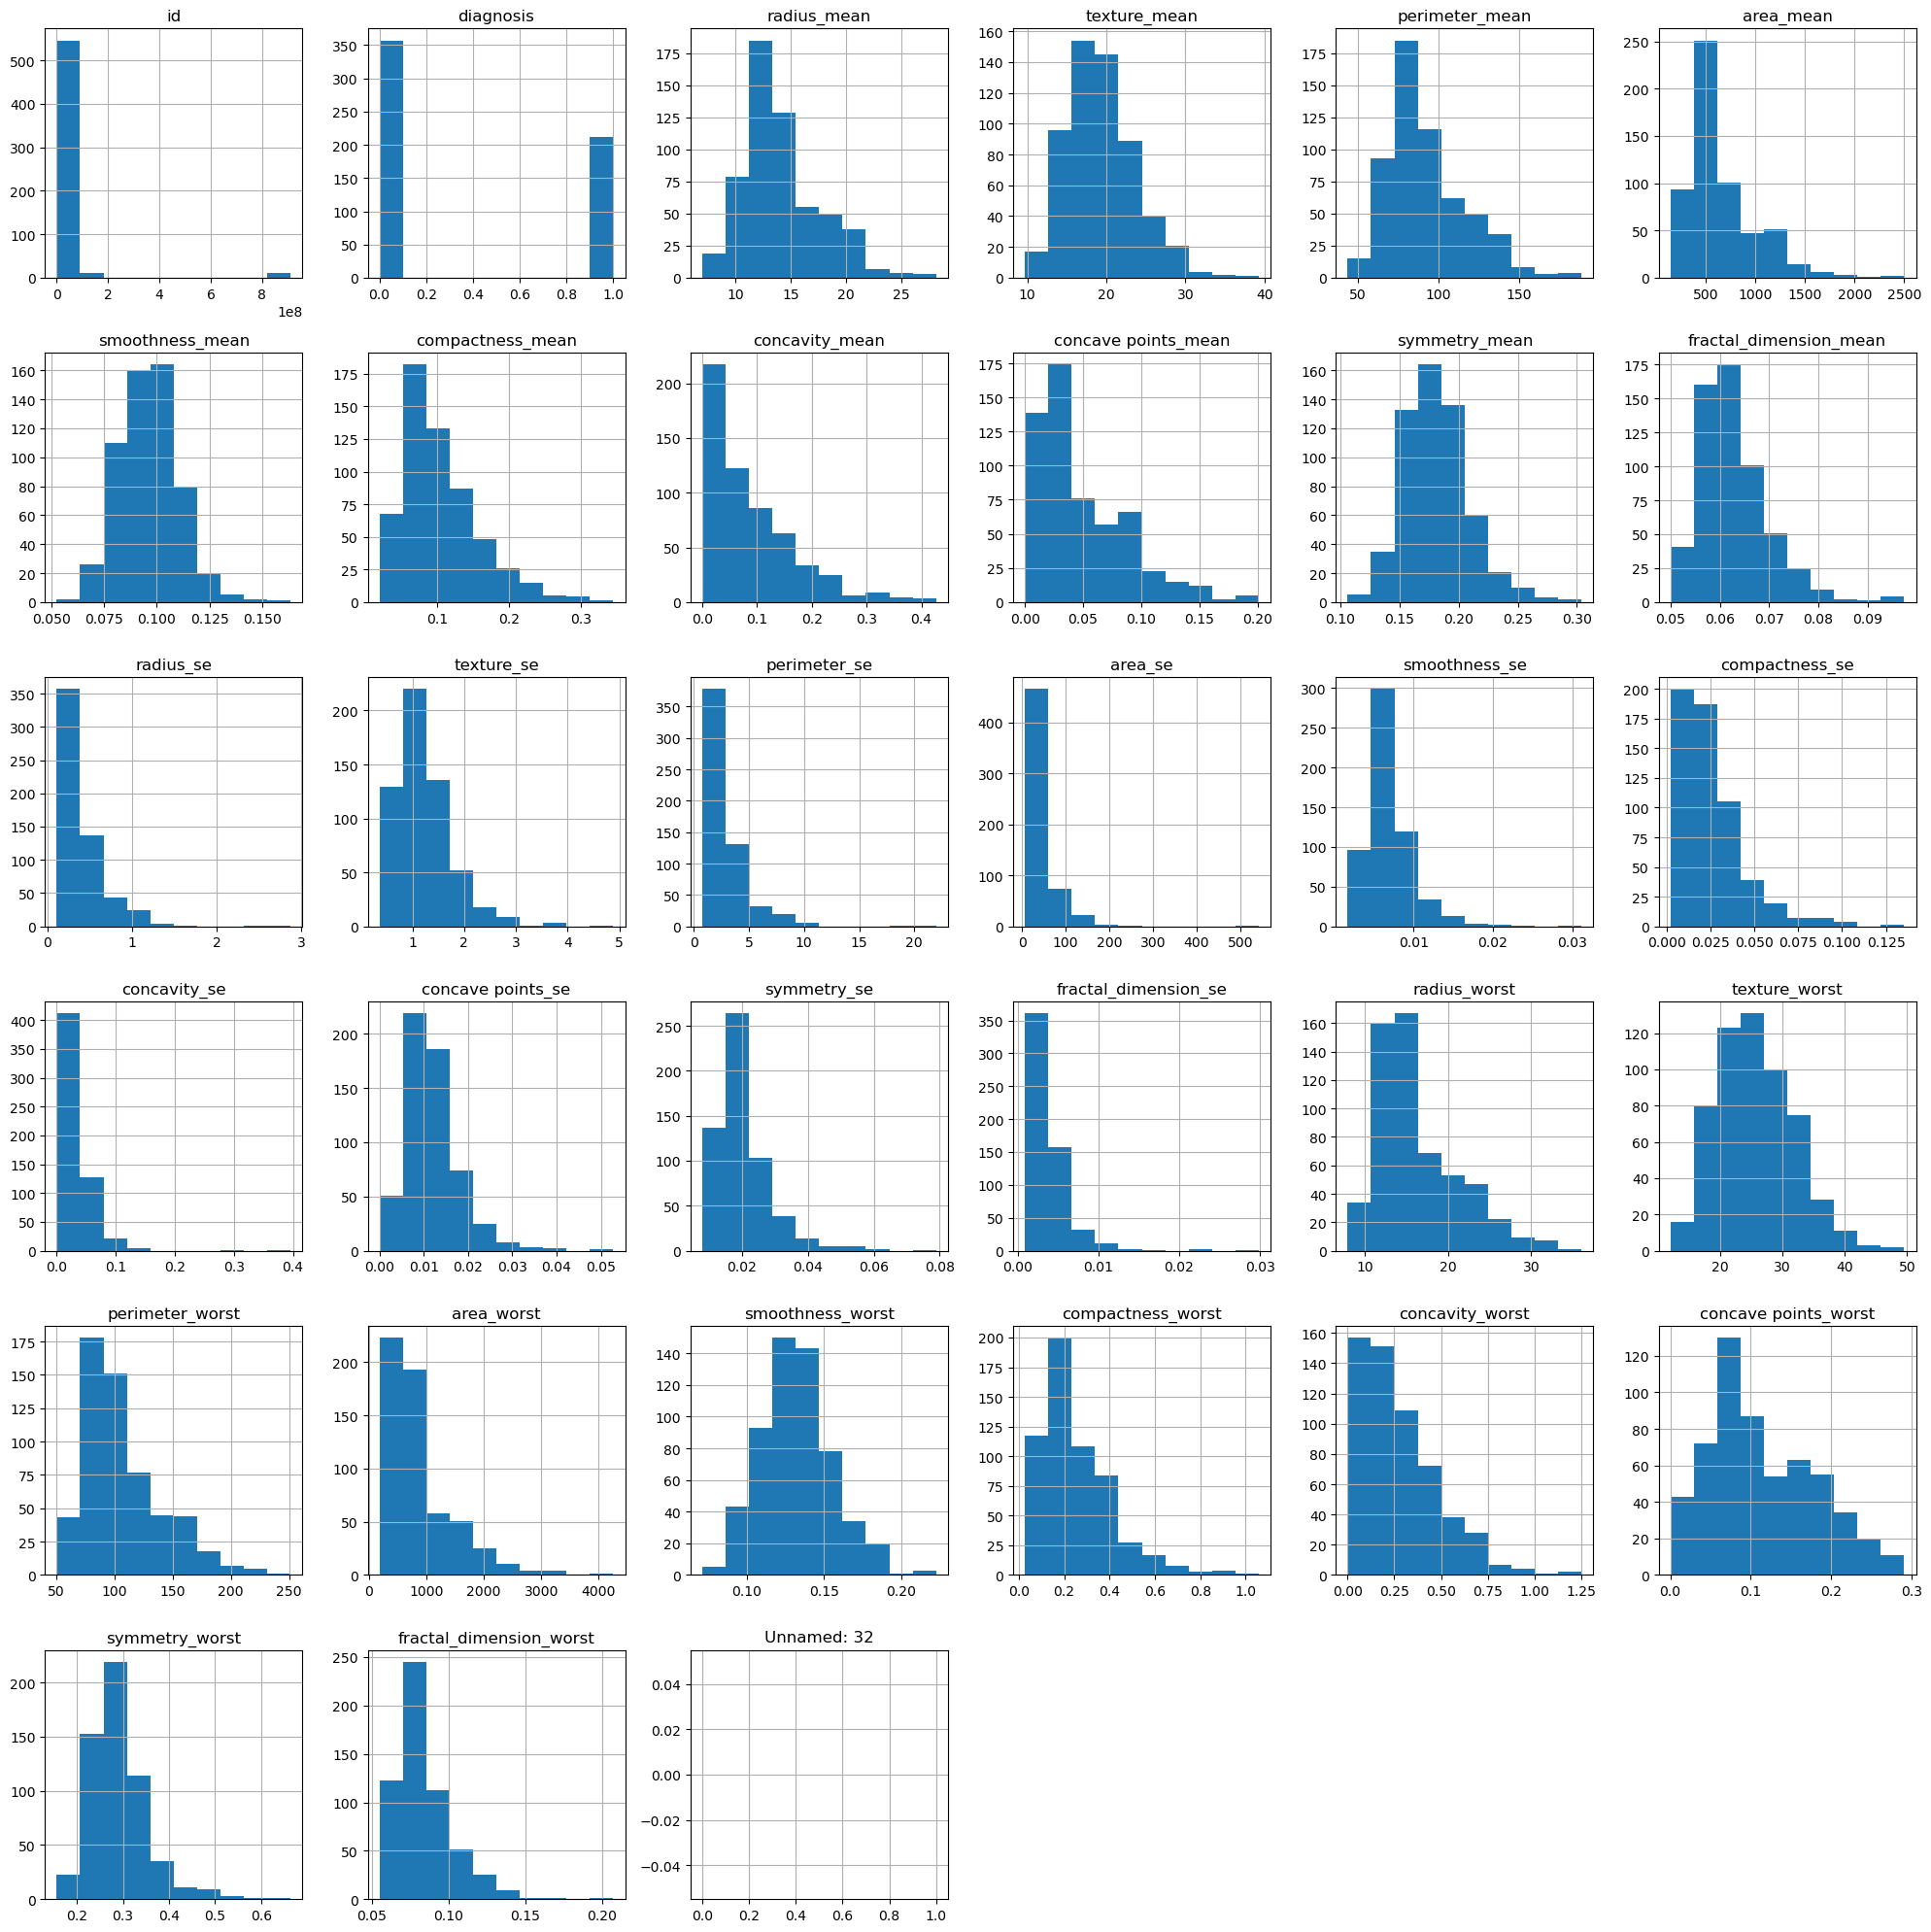

In [15]:
import matplotlib.pyplot as plt
# Draw histograms of numerical features
df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()


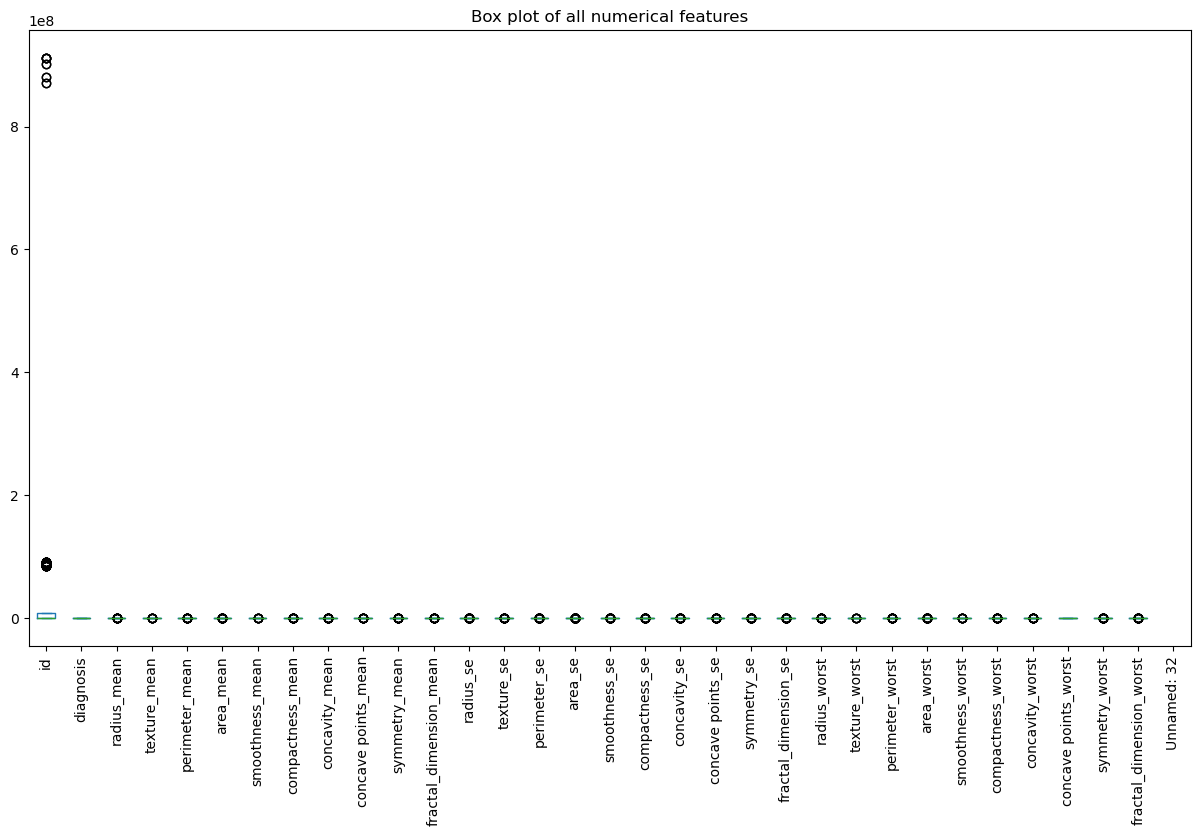

In [16]:
import matplotlib.pyplot as plt
# Box plot of all numerical features
df.plot(kind='box', figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Box plot of all numerical features')
plt.show()

C:\Users\Yasir iT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yasir iT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yasir iT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


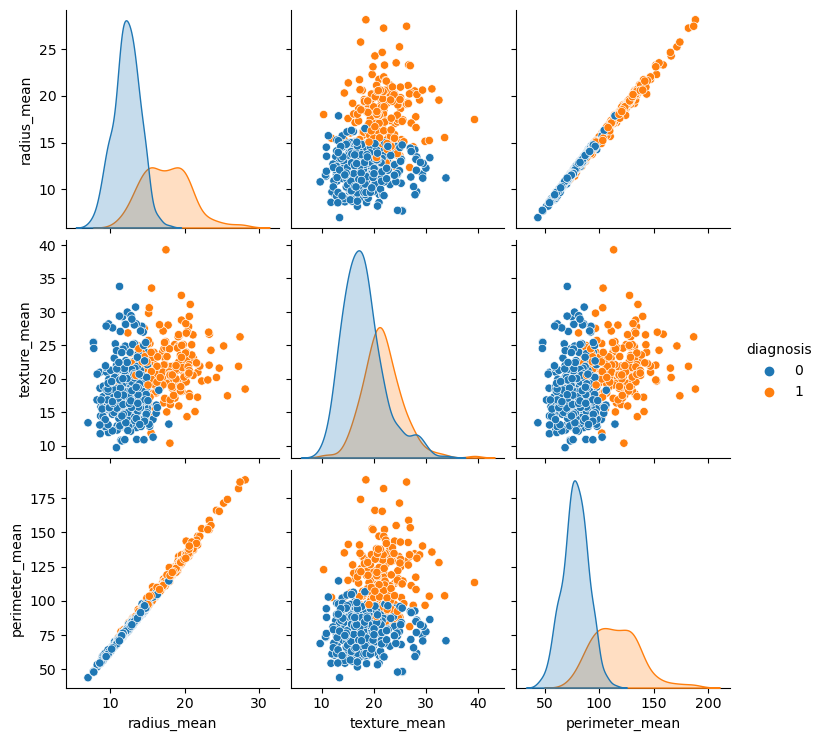

In [17]:
import seaborn as sns

sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

#### Check for null values

In [19]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Check for duplicate rows

In [20]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


#### covariance_matrix

In [21]:
import numpy as np

# Assuming 'data' is your DataFrame containing the variables
covariance_matrix = np.cov(df.T)


In [22]:
covariance_matrix

array([[ 1.56301468e+16,  2.40598315e+06,  3.28788291e+07, ...,
        -3.42061639e+05, -6.74375086e+04,             nan],
       [ 2.40598315e+06,  2.34176589e-01,  1.24495449e+00, ...,
         1.24633432e-02,  2.83069850e-03,             nan],
       [ 3.28788291e+07,  1.24495449e+00,  1.24189201e+01, ...,
         3.57457580e-02,  4.49735060e-04,             nan],
       ...,
       [-3.42061639e+05,  1.24633432e-02,  3.57457580e-02, ...,
         3.82758354e-03,  6.00994206e-04,             nan],
       [-6.74375086e+04,  2.83069850e-03,  4.49735060e-04, ...,
         6.00994206e-04,  3.26209378e-04,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

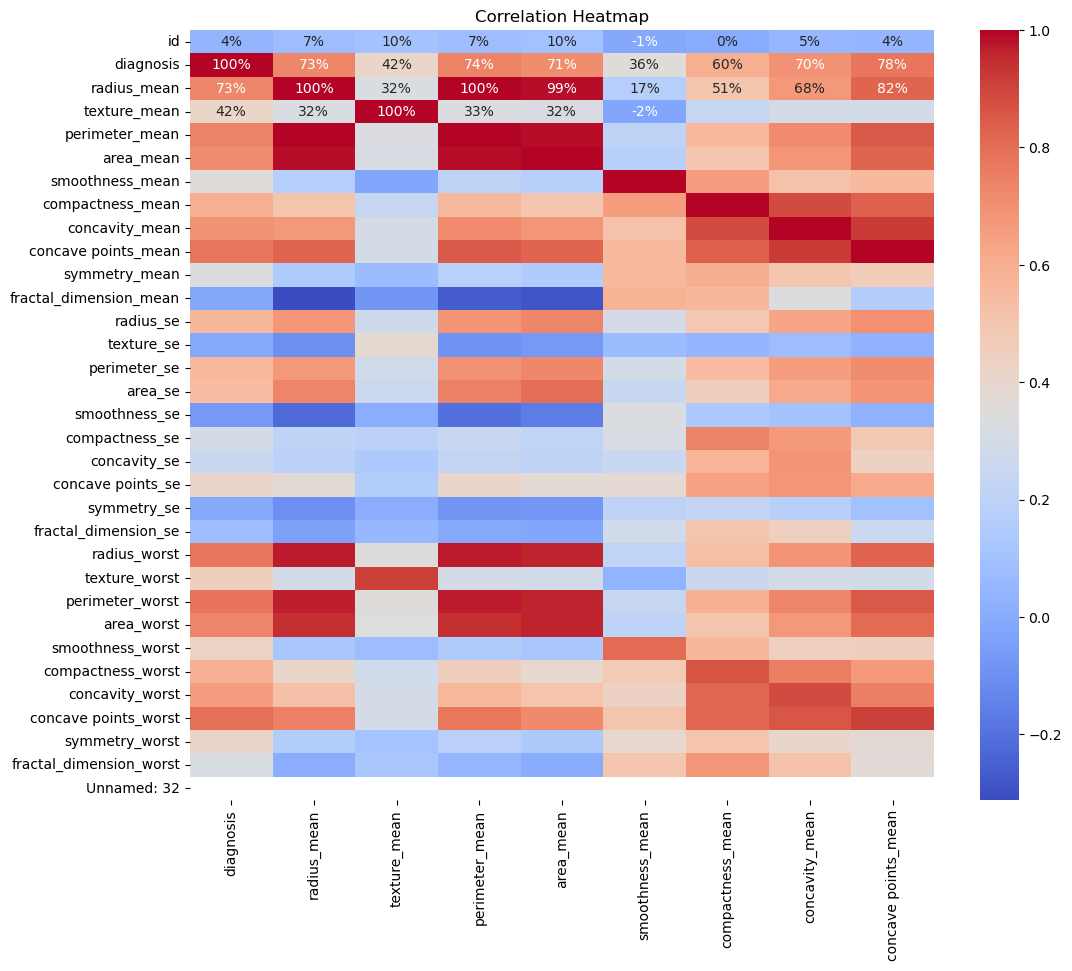

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()


# Set the size of the figure
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix.iloc[:,1:10], annot=True, cmap='coolwarm', fmt=".0%")
plt.title('Correlation Heatmap')
plt.show()

# 4. Model Selection and Evaluation:


We applied several classification techniques to the dataset and evaluated their performance using various metrics such as accuracy, precision, recall, and F1-score. The models considered include but are not limited to:

Logistic Regression

Naive Bayes

Support Vector Classifier (SVC)

Random Forest

Gradient Boosting

KNN Classifier

Linear Discriminant Analysis (LDA)

Quadratic Discriminant Analysis (QDA)

Neural Network

In [24]:
df = df.drop('Unnamed: 32', axis=1)

In [25]:
data=df

#### Split the data into train and test sets (80% train, 20% test)

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'target' is the target variable
X = data.drop(columns=['diagnosis'])  # Features (excluding the target variable)
y = data['diagnosis']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (455, 31)
Shape of X_test: (114, 31)
Shape of y_train: (455,)
Shape of y_test: (114,)


# Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


### k fold cross-validation for Logistic Classication

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Perform K-fold cross-validation with k=10
k = 10
cv_scores = cross_val_score(model, X, y, cv=k)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print average accuracy
print("Average accuracy:", cv_scores.mean())


Cross-validation scores: [0.61403509 0.38596491 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.36842105 0.63157895 0.625     ]
Average accuracy: 0.5782894736842106


# Naive Bayes model

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.6140350877192983
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114

Confusion Matrix:
[[70  1]
 [43  0]]


### k fold cross-validation 

In [30]:

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(nb_classifier, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


Cross-validation scores: [0.60526316 0.62280702 0.63157895 0.61403509 0.62831858]
Mean accuracy: 0.6204005589194225


# Support Vector Classifier (SVC)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train SVM model
model = SVC(kernel='linear')  # Linear kernel for classification
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### k fold cross-validation 

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the Support Vector Machine classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(svm_classifier, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### k fold cross-validation 

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(rf_classifier, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


# Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)  # 100 decision trees
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### k fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(gb_classifier, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


# Decision Tree

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### k fold cross-validation 

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier



# Initialize the Decision Tree classifier
DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(DecisionTreeClassifier, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


# KNN classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors here

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)




### k fold cross-validation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors here

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)


# Discriminant Analysis

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the LDA classifier
lda_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lda = lda_classifier.predict(X_test_scaled)

# Calculate accuracy for LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy for Linear Discriminant Analysis (LDA):", accuracy_lda)

# Generate classification report for LDA
class_report_lda = classification_report(y_test, y_pred_lda)
print("Classification Report for Linear Discriminant Analysis (LDA):")
print(class_report_lda)

# Calculate confusion matrix for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix for Linear Discriminant Analysis (LDA):")
print(conf_matrix_lda)

# Initialize Quadratic Discriminant Analysis (QDA) classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the QDA classifier
qda_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_qda = qda_classifier.predict(X_test_scaled)

# Calculate accuracy for QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("Accuracy for Quadratic Discriminant Analysis (QDA):", accuracy_qda)

# Generate classification report for QDA
class_report_qda = classification_report(y_test, y_pred_qda)
print("Classification Report for Quadratic Discriminant Analysis (QDA):")
print(class_report_qda)

# Calculate confusion matrix for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix for Quadratic Discriminant Analysis (QDA):")
print(conf_matrix_qda)


### k fold cross-validation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()

# Perform k-fold cross-validation for LDA
k = 5  # Number of folds
cv_scores_lda = cross_val_score(lda_classifier, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores for LDA
print("Cross-validation scores for Linear Discriminant Analysis (LDA):", cv_scores_lda)

# Calculate and print the mean accuracy for LDA
mean_accuracy_lda = cv_scores_lda.mean()
print("Mean accuracy for Linear Discriminant Analysis (LDA):", mean_accuracy_lda)

# Initialize Quadratic Discriminant Analysis (QDA) classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Perform k-fold cross-validation for QDA
cv_scores_qda = cross_val_score(qda_classifier, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores for QDA
print("Cross-validation scores for Quadratic Discriminant Analysis (QDA):", cv_scores_qda)

# Calculate and print the mean accuracy for QDA
mean_accuracy_qda = cv_scores_qda.mean()
print("Mean accuracy for Quadratic Discriminant Analysis (QDA):", mean_accuracy_qda)


# neural network model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


# 5. Results and Discussion:

#### Mean Accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis()
}

# Add neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["Neural Network"] = nn_model

# Calculate mean accuracy for each model
mean_accuracies = []
for name, model in models.items():
    if name == "Neural Network":
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred_probs = model.predict(X_test_scaled).ravel()
        y_pred = [1 if pred_prob >= 0.5 else 0 for pred_prob in y_pred_probs]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    mean_accuracies.append(accuracy)

# Create DataFrame to display mean accuracies
df = pd.DataFrame({"Model": list(models.keys()), "Mean Accuracy": mean_accuracies})
print(df)


In [ ]:
import matplotlib.pyplot as plt

# Create figure and plot
plt.figure(figsize=(10, 6))
plt.plot(df["Model"], df["Mean Accuracy"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy of Different Classification Models")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


#### Classification Report:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis()
}

# Add neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["Neural Network"] = nn_model

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

# Calculate metrics for each model
for name, model in models.items():
    if name == "Neural Network":
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred_probs = model.predict(X_test_scaled).ravel()
        y_pred = [1 if pred_prob >= 0.5 else 0 for pred_prob in y_pred_probs]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

# Create DataFrame to display metrics
metrics_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1-score": f1_score_list
})

# Print the comparison table
print(metrics_df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    "Model": ["Logistic Regression", "Naive Bayes", "SVC", "Random Forest", 
              "Gradient Boosting", "KNN Classifier", "Linear Discriminant Analysis (LDA)", 
              "Quadratic Discriminant Analysis (QDA)", "Neural Network"],
    "Accuracy": [0.991150, 0.946903, 0.982301, 0.964602, 0.973451, 0.964602, 0.973451, 0.964602, 0.991150],
    "Precision": [1.000, 0.950, 1.000, 0.975, 1.000, 1.000, 1.000, 0.975, 1.000],
    "Recall": [0.976190, 0.904762, 0.952381, 0.928571, 0.928571, 0.904762, 0.928571, 0.928571, 0.976190],
    "F1-score": [0.987952, 0.926829, 0.975610, 0.951220, 0.962963, 0.950000, 0.962963, 0.951220, 0.987952]
}

df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Plot individual line graphs for each metric with a larger size and sky-blue background color
plt.figure(figsize=(14, 10), facecolor='skyblue')

# Plot Accuracy
plt.subplot(2, 2, 1)
df['Accuracy'].plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot Precision
plt.subplot(2, 2, 2)
df['Precision'].plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot Recall
plt.subplot(2, 2, 3)
df['Recall'].plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot F1-score
plt.subplot(2, 2, 4)
df['F1-score'].plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('F1-score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# Receiver Operating Characteristic (ROC) Curve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis()
}

# Add neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["Neural Network"] = nn_model

# Dictionary to store AUC values
auc_values = {}

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if name == "Neural Network":
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred_probs = model.predict(X_test_scaled).ravel()
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    # Store AUC value
    auc_values[name] = auc

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Find the model with the highest AUC
best_model = max(auc_values, key=auc_values.get)
print(f"The best model based on AUC is: {best_model} (AUC = {auc_values[best_model]:.0%})")


##### Based on our analysis, the models were evaluated based on their performance metrics. Among the models considered, Logistic Regression and Neural Network emerged as the top-performing models, exhibiting high accuracy, precision, recall, and F1-score. Logistic Regression, in particular, stood out for its interpretability and simplicity, making it an ideal choice for clinical applications where interpretability is crucial.

#### Save the best model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(logistic_model, 'logistic_regression_model.pkl')


#### input data (features) for prediction

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Prepare input data (features) for prediction
input_data = pd.DataFrame({
    'radius_mean': [20.57],
    'texture_mean': [10.38],
    'perimeter_mean': [130],
    'area_mean': [1040],
    'smoothness_mean': [0.09463],
    'compactness_mean': [0.109],
    'concavity_mean': [0.09366],
    'concave points_mean': [0.074],
    'symmetry_mean': [0.1528],
    'fractal_dimension_mean': [0.06082],
    'radius_se': [0.05338],
    'texture_se': [0.2121],
    'perimeter_se': [1.033],
    'area_se': [36.58],
    'smoothness_se': [0.009769],
    'compactness_se': [0.03126],
    'concavity_se': [0.05051],
    'concave points_se': [0.01992],
    'symmetry_se': [0.02981],
    'fractal_dimension_se': [0.003002],
    'radius_worst': [16.84],
    'texture_worst': [27.66],
    'perimeter_worst': [112],
    'area_worst': [876.5],
    'smoothness_worst': [0.1131],
    'compactness_worst': [0.1924],
    'concavity_worst': [0.2322],
    'concave points_worst': [0.1119],
    'symmetry_worst': [0.2809],
    'fractal_dimension_worst': [0.06287]
})

# Make predictions
predictions = model.predict(input_data)

# Print predictions
print("Predictions:", predictions)
# Additional context
print("diagnosis: The diagnosis of the breast tissues, where 'M' indicates malignant (1) and 'B' indicates benign (0).")


# 6. Hidden Insights:

###### During our analysis, we uncovered some hidden insights from the dataset. For instance, certain tumor characteristics such as irregular shape and high concavity were strongly associated with malignant tumors, highlighting their importance in tumor classification. Additionally, features related to the texture and density of the tumor may also provide valuable information for improving classification accuracy.

# 7. Recommendations:


##### Based on our analysis, we offer the following recommendations:

##### Regular screening and early detection remain essential for improving breast cancer outcomes. Our machine learning models can assist healthcare professionals in accurately classifying tumors, enabling timely interventions.

##### Future research could focus on incorporating additional features, such as genetic markers or biomarkers, to further enhance the predictive performance of the models.

##### Continuous monitoring and updating of the models with new data are necessary to ensure their effectiveness in real-world clinical settings.

# 8. Conclusion:

##### In conclusion, our study demonstrates the effectiveness of machine learning techniques in accurately classifying breast tumors as Benign or Malignant based on tumor shape and geometry. Logistic Regression emerged as the preferred model due to its interpretability and excellent performance metrics. By leveraging these models, healthcare professionals can make more informed decisions regarding patient diagnosis and treatment strategies, ultimately improving patient outcomes in the fight against breast cancer.